# Noise

In [1]:
from functools import partial

import scipy as sp
import numpy as np
from scipy.integrate import solve_ivp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper', font_scale=1.4)

In [2]:
offset = 1

def turing(coupling, _, uv):
    assert (uv >= 0).all()
    u = uv[:101]
    v = uv[101:]

    dudt = 0.5*(u - offset) + 0.6*(v - offset) - (u - offset)**3 + 2*coupling(u)
    dvdt = -1.9*(u - offset) - 2*(v - offset) + 25*coupling(v)
    return np.append(dudt, dvdt)

x = np.arange(0, 101, 1)

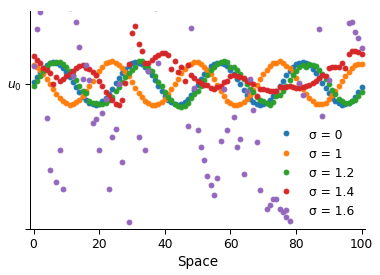

In [3]:
def regularized_euler(fun, t_span, y0, dt):
    for _ in range(int((t_span[1] - t_span[0])/dt)):
        y0 += fun(_, np.maximum(y0, 0))*dt
    return y0


def diff_w_noise(std, u):
    lapl = np.empty(len(u))
    lapl[0] = u[-1] - 2*u[0] + u[1]
    lapl[1:-1] = u[:-2] - 2*u[1:-1] + u[2:]
    lapl[-1] = u[-2] - 2*u[-1] + u[0]
    return lapl*np.random.normal(1, std, len(u))


for i, std in enumerate((0, 1, 1.2, 1.4, 1.6)):
    uv_0 = offset + np.random.rand(len(x)*2)/10
    noisy_diffusion = partial(diff_w_noise, std)
    uv = regularized_euler(partial(turing, noisy_diffusion), [0, 1e3], uv_0, 0.0125)
    color = sns.color_palette()[i]
    plt.plot(x, uv[101:], color=color, marker='o', ls='', label="σ = {}".format(std))
    plt.xlabel('Space')
    plt.xlim([-1, 101])
    plt.ylim([0, offset*1.5])
    plt.yticks([0, offset], ['', '$u_0$'])
plt.legend(frameon=False)
sns.despine()
plt.savefig('noise.png', dpi=300)
plt.show()

In [4]:
# def diff_w_constant_noise(noise, u):
#     lapl = np.empty(len(u))
#     lapl[0] = u[-1] - 2*u[0] + u[1]
#     lapl[1:-1] = u[:-2] - 2*u[1:-1] + u[2:]
#     lapl[-1] = u[-2] - 2*u[-1] + u[0]
#     return lapl + noise


# for i, std in enumerate([0, 0.0125, 0.025, 0.05, 0.1]):
#     uv_0 = offset + np.random.rand(len(x)*2)/100
#     noise = np.random.normal(0, std, len(x))
#     noisy_diffusion = partial(diff_w_constant_noise, noise)
#     uv = euler(partial(turing, noisy_diffusion), [0, 1e3], uv_0, 0.005)

#     color = sns.color_palette()[i]
#     plt.plot(x, uv[101:], color=color, marker='o', ls='')
#     plt.plot(x, noise, color=color, marker='o', ls='')
#     plt.xlabel('Space')
#     plt.xlim([-1, 101])
#     plt.yticks([0, offset], ['', '$u_0$'])

# sns.despine()
# plt.show()

In [6]:
# for i, std in enumerate([0, 0.0125, 0.025, 0.05, 0.1]):
#     uv_0 = offset + np.random.rand(len(x)*2)/100
#     noise = np.random.normal(0, std, len(x))
#     noisy_diffusion = partial(diff_w_constant_noise, noise)
#     uv = solve_ivp(partial(turing, noisy_diffusion), [0, 1e3], uv_0, 'BDF')

#     color = sns.color_palette()[i]
#     plt.plot(x, uv.y[:, -1][101:], color=color, marker='o', ls='')
#     plt.plot(x, noise, color=color, marker='o', ls='')
#     plt.xlabel('Space')
#     plt.xlim([-1, 101])
#     plt.yticks([0, offset], ['', '$u_0$'])

# sns.despine()
# plt.show()